In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
data=pd.read_csv("COVID-19-time-series-clean-complete.csv")


data.head(2)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0


In [59]:
data['Date']=pd.to_datetime(data['Date'],yearfirst=True)    #format="%Y-%m-%d"
data['New_Date']=data['Date'].map(lambda date:date.year*100+date.month)

# data.head(2)
tx_max_patient=data.groupby(["Country/Region","New_Date"])["Active"].sum().reset_index()
tx_max_fourth_patient=tx_max_patient.query("New_Date==202004").groupby('Active').max().reset_index()
max_patient=tx_max_fourth_patient[-8:-1]
max_patient.head(9)

,Active,Country/Region,New_Date
175,1023297.0,Russia,202004
176,1636325.0,Germany,202004
177,1671945.0,Turkey,202004
178,2028962.0,France,202004
179,2621463.0,Spain,202004
180,2856248.0,United Kingdom,202004
181,3017835.0,Italy,202004


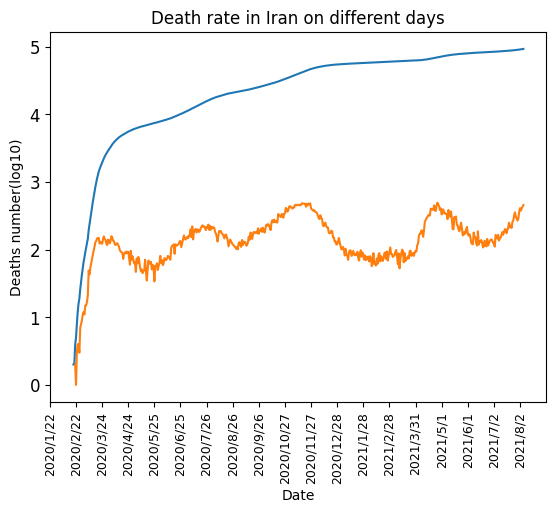

In [76]:
data['Date']=pd.to_datetime(data['Date'],yearfirst=True)    #format="%Y-%m-%d"
data['New_Date']=data['Date'].map(lambda date:f'{date.year}/{date.month}/{date.day}')
data.rename(columns={'Country/Region':'Country'},inplace=True)


data=data.query("Country=='Iran'")
tx_iran=data.copy()
# for i in range(len(tx_iran['Deaths'])):
#     if tx_iran['Deaths'].values[i]== 0:
#         tx_iran['Deaths'].loc[i]=1  
#     if tx_iran['New deaths'].values[i]== 0:
#         tx_iran['New deaths'].loc[i]=1  
with np.errstate(divide='ignore'):
    tx_iran['log_death']=np.log10(tx_iran['Deaths'])
    tx_iran['log_newdeath']=np.log10(tx_iran['New deaths'])

plt.plot(tx_iran['New_Date'].to_numpy(dtype=str),tx_iran['log_death'].to_numpy())
plt.plot(tx_iran['New_Date'].to_numpy(dtype=str),tx_iran['log_newdeath'].to_numpy())
plt.xlabel("Date")
plt.ylabel("Deaths number(log10)")
plt.title("Death rate in Iran on different days")

plt.xticks(np.arange(0, len(tx_iran), 31), fontsize=9)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.show()

